# Linear Algebra

In [36]:
#importing libraries
import numpy
import numpy as np
import numpy.linalg as nla
import scipy.linalg as sla
import matplotlib.pyplot as plt
import matplotlib.image

#setting printout precision
np.set_printoptions(suppress=True)

## Singlular Value Decomposition
* The **singular value decomposition (SVD)** of a matrix allows a matrix to be represented as a product of three *special* matrices
* If $A$ is an $m \times n$ matrix, then we can rewrite it as the product \begin{equation} A = U_{m\times m} \cdot S_{m \times n} \cdot V_{n \times n} \end{equation} where $U$ and $V$ are orthogonal matrices, while $S$ is a diagonal matrix.

## Calculating the SVD of a matrix

In [21]:
# creating the matrix A
A = np.array([ [1, 2], [3, 4], [5, 6] ])
print('A = \n', A)

# getting the SVD
U, S, V = nla.svd(A)

print('U = \n', U)

print('S = \n', S) # this one is given as an array, not a matrix

print('V = \n', V)


# check if it really works
# Step 1: Create a diagonal verson of S
S1 = np.zeros(A.shape)
np.fill_diagonal(S1, S)

# Step 2: Multiply and print
print('Reconstructed = \n', U.dot(S1.dot(V)))

A = 
 [[1 2]
 [3 4]
 [5 6]]
U = 
 [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
S = 
 [9.52551809 0.51430058]
V = 
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]
Reconstructed = 
 [[1. 2.]
 [3. 4.]
 [5. 6.]]


In [82]:
# Tougher example: Hilbert's Matrix
order = 5
H = np.zeros((order, order))

for i in range(order):
    for j in range(order):
        H[i, j] = 1/(i + j + 1)

print('H = \n', H)


# getting the SVD
U, S, V = nla.svd(H)

print('U = \n', U)

print('S = \n', S) # this one is given as an array, not a matrix

print('V = \n', V)


# check if it really works
# Step 1: Create a diagonal verson of S
S1 = np.zeros(H.shape)
np.fill_diagonal(S1, S)

# Step 2: Multiply and print
print('Reconstructed = \n', U.dot(S1.dot(V)))


H = 
 [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
U = 
 [[-0.76785474  0.60187148 -0.21421362  0.04716181  0.00617386]
 [-0.44579106 -0.27591342  0.72410213 -0.43266733 -0.11669275]
 [-0.32157829 -0.42487662  0.12045328  0.66735044  0.50616366]
 [-0.25343894 -0.44390304 -0.30957397  0.23302452 -0.76719119]
 [-0.20982264 -0.42901335 -0.56519341 -0.55759995  0.37624555]]
S = 
 [1.56705069 0.20853422 0.01140749 0.0003059  0.00000329]
V = 
 [[-0.76785474 -0.44579106 -0.32157829 -0.25343894 -0.20982264]
 [ 0.60187148 -0.27591342 -0.42487662 -0.44390304 -0.42901335]
 [-0.21421362  0.72410213  0.12045328 -0.30957397 -0.56519341]
 [ 0.04716181 -0.43266733  0.66735044  0.23302452 -0.55759995]
 [ 0.00617386 -0.11669275  0.50616366 -0.76719119  0.3762455

## Low-rank SVD approximation
* Instead using the full matrices $U$, $S$ and $V$ for reconstruction of the original matrix (this is pointless), we can *approximate* the original matrix with **less information**
* The advantage of this is that we will be using less memory to store the data, and, additionally -- eliminate any *noise* that the data might contain (essentially, we will be cleaning up possibly garbled data)
* The approximation is called **low-rank SVD approximation**
* The approximation of order $k$ uses only the first $k$ columns of $U$, the first (largest) $k$ singular values from $S$, and the first $k$ rows of $V$.

In [84]:
# Construct the rank 3 approximation to H

# Getting the 3 rows, columns
k = 3
Uk = U[:, :k]
Sk = S1[:k, :k]
Vk = V[:k, :]

#Constructing the approximation
Hk = Uk.dot(Sk.dot(Vk))
print('Hk = \n', Hk); print()

print('H = \n', H)

Hk = 
 [[0.99999932 0.50000624 0.3333237  0.24999665 0.20000804]
 [0.50000624 0.33327602 0.25008852 0.20003055 0.16659301]
 [0.3333237  0.25008852 0.19986292 0.16662037 0.14297035]
 [0.24999665 0.20003055 0.16662037 0.1428386  0.1250407 ]
 [0.20000804 0.16659301 0.14297035 0.1250407  0.11101554]]

H = 
 [[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]


## Example: image compression
* Since images are matrices, low-rank SVD approximation can be applied to filtering and compressing images
* For simplicity, the images are converted into grayscale coloring

(512, 512, 3)


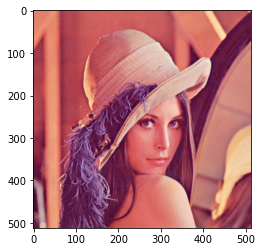

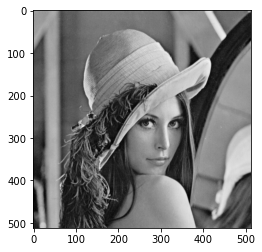

In [89]:
# Load the image
img = matplotlib.image.imread('lena.png')

# show the image
plt.figure()
plt.imshow(img)

# convert to grayscale and show
def rgb2gray(rgb):
    #return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
    return rgb[...,:3].dot([0.2989, 0.5870, 0.1140])

img_gs = rgb2gray(img)

plt.figure()
plt.imshow(img_gs, cmap='gray')

In [51]:
# Show the matrix of the image
img_gs[:5, :5]

array([[0.63615845, 0.63615845, 0.63621845, 0.6316812 , 0.63622512],
       [0.63615845, 0.63615845, 0.63621845, 0.6316812 , 0.63622512],
       [0.63615845, 0.63615845, 0.63621845, 0.6316812 , 0.63622512],
       [0.63615845, 0.63615845, 0.63621845, 0.6316812 , 0.63622512],
       [0.63615845, 0.63615845, 0.63621845, 0.6316812 , 0.63622512]])

In [ ]:
# Perform SVD decomposition
U, S, V = nla.svd(img_gs)

print('U = \n', U)

print('S = \n', S) # this one is given as an array, not a matrix

print('V = \n', V)

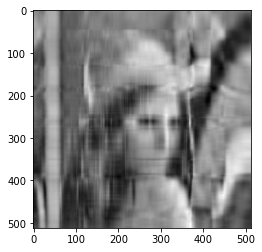

In [55]:
# Performing low-rank approximation
k = 10
Uk = U[:, :k]
Sk = np.zeros((k ,k))
np.fill_diagonal(Sk, S[:k])
Vk = V[:k, :]

#Constructing the approximation
img_low_rank = Uk.dot(Sk.dot(Vk))

#Show the image
plt.imshow(img_low_rank, cmap='gray')

## Assignment
* Write a function which will display and save the k-th low-rank approximation to an image
* The input arguments are the image and the integer k, the output should be a file in an image format

In [79]:
def k_svd_image(image, k):
    img = matplotlib.image.imread(image) #load the image
    
    img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140]) #convert to grayscale
    
    U, S, V = nla.svd(img) #get the SVD of the image matrix
    
    #generate the submatrices with k rows/columns
    Uk = U[:, :k]
    Sk = np.zeros((k, k))
    np.fill_diagonal(Sk, S[:k])
    Vk = V[:k, :]
    
    img_low_rank = Uk.dot(Sk.dot(Vk)) #construct the approximation
    
    plt.imshow(img_low_rank, cmap = 'gray') #show the approximation
    
    plt.imsave('image_output.png', img_low_rank, cmap = 'gray')

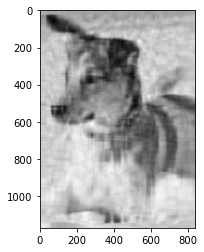

In [80]:
k_svd_image('mordecai.jpg', 15)